## Indicaciones
Para realizar esta regresión lineal no se utilizo la librearia sklearn  la cual utiliza directamente la regresión lineal. Si no que se realizo utilizando las formulas matemáticas tales como :
- Funcion de coste
- Descenso del gradiente
- Normalizacion de features 

El ejercicio empieza importando lo datos, luego podra ver las funciones de plot, featureNormalize, computeCost,gradientDescent y llegara a la sección de "Entrenando nuestro modelo"  ahi podra modificar los valores de "alpha" e "iterations" y podra visualizar como converge o diverge el descenso del gradiente

## Importando librerias

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
import pandas as pd 
from sklearn.model_selection import train_test_split
%matplotlib notebook 

In [70]:
df = pd.read_csv("./StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Visualizando datos

In [71]:
m = 1000
X = np.array(df.iloc[:,6]) #reading score
X = X.reshape(m,1)
y = np.array(df.iloc[:,7]) #writing score
y = y.reshape(m,1)

#Agrega  una fila de unos a X 
XX= X.T 
ones = np.ones((1,m)) 
X_plus_one = np.concatenate((ones,XX)) 
XA = X_plus_one.transpose()

<IPython.core.display.Javascript object>


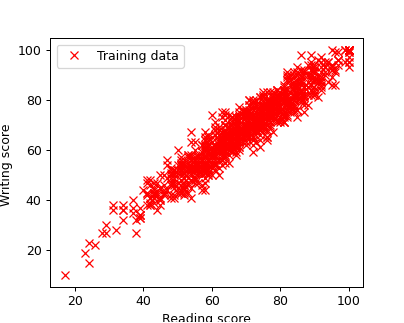

In [72]:
fig1 = plt.figure(figsize=(5,4),dpi=100)
plt.plot(  X,y ,'rx',label="Training data" )
plt.xlabel("Reading score")
plt.ylabel('Writing score ')
plt.legend()

 ## Descenso del Gradiente
- El objetivo de la regresión lineal es minimizar la función de coste

$$ J(\theta)= \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})- y^{(i)})^{2} $$

- Donde la hipotesis $h_{	\theta}(x)$  viene dado por el modelo lineal

$$h_{	\theta}(x) = 	\theta^{T}x = 	\theta_{0} + 	\theta_{1}x   $$
Los parametros del modelo son $	\theta_{j}$  .
Estos son los valores que se nesesita para minimizar la funcion de coste J(	\theta). 

El algoritmo del descenso del gradiente en cada iteración actualiza los valores de 	$\theta$

$$	\theta_{j} = 	\theta_{j} - α\frac{1}{m}\sum_{i=1}^{m}(h_{	\theta}(x^{(i)})- y^{(i)})x_{j}^{i} $$ 
(actualiza simultaneamente  $	\theta_{j}$ para todos los valores de j ).

- Normalisación de fictures
Para que el descenso del gradiente converja mas rapido se necesita scalar los features 
    $$X_{norm} = \frac{(x_{i} - mu )}{ sigma}$$
    
    Donde :

        mu  =  promedio de los conjuntos de entrenamiento
    
        sigma = desviación estandar


 

In [73]:
def plot_gradient():
    fig2 = plt.figure(figsize=(8,6))
    ax3d = plt.axes(projection="3d")


    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-10, 10, 100)

    # Inicializa  J_vals 
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    # Calcular los valores para J_vals
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.array([ [theta0_vals[i]], [theta1_vals[j]]])        
            J_vals[i,j] = computeCost(X_norm, y_norm, t)
     
    
    J_vals = np.transpose(J_vals)
    theta0_vals,theta1_vals = np.meshgrid(theta0_vals,theta1_vals)

    surf = ax3d.plot_surface(theta0_vals, theta1_vals, J_vals,cmap=cm.cool)
    
    ax3d.set_title('Cost Function J')
    ax3d.set_xlabel('$θ_{0}$')
    ax3d.set_ylabel('$θ_{1}$')
    ax3d.set_zlabel('$J(θ_{0},θ_{1} )$')    

In [74]:
def plot_contour(p0,p1):  
    fig3 = plt.figure(figsize=(10,6))

    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-10, 10, 100)
    # Inicializa  J_vals 
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
    
    # Calcular los valores para J_vals
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.array([ [theta0_vals[i]], [theta1_vals[j]]])        
            J_vals[i,j] = computeCost(X_norm, y_norm, t)
        
    
    J_vals = np.transpose(J_vals)
    
    
    plt.subplot(121)
    plt.plot (p0,p1,"o",c="k" )
    plt.contour(theta0_vals,theta1_vals,J_vals, np.logspace(-2, 3, 20),colors = "b")

    plt.ylabel('$θ_{1}$')
    plt.xlabel('$θ_{0}$')      

In [75]:
# Scalar features 
def featureNormalize(X):
    X_norm = X
    mu = np.zeros( (1, np.size(X, 1)) )  # media
    sigma = np.zeros((1, np.size(X, 1) ))  #desviacion estandar
    m = len(X)
    
    mu = np.mean(X,axis=0)
    sigma = np.sum((X - mu)**2,axis=0 )/(m-1)
    sigma = np.sqrt(sigma)

    X_norm = (X - mu )/ sigma;
    return X_norm

In [76]:
def computeCost(X,y,theta):
    m = len(y)
    J = 0
    
    H = X.dot(theta)
    J = np.square(H - y)
    J = np.sum(J)/(2*m)
    return J    

In [90]:
def gradientDesccent(X,y,alpha,num_iters):
    m =len(y)
    J_history  = np.zeros((num_iters,1))
    
    # Genera un punto random de inicio para theta
    theta = np.random.rand(2)* 20 - 10
    theta = theta.reshape(2,1)
    
    plot_contour(theta[0],theta[1]) # llama la funcion plot_contour que realiza una grafica de contorno
    
    for ite in range(num_iters):
        theta = theta  - (alpha/m)* np.transpose(X).dot(X.dot(theta)-y) 
        J_history[ite] = computeCost(X,y,theta)
        #print(J_history)
        
        # Imprime los pasos del descenso del gradiente
        if ite % 10 == 0 and ite >1 :
           
            plt.plot(theta[0],theta[1]  ,'rx')

        
    return (J_history,theta)

## Configuraciones previas

In [78]:
# Normalizar los datos
X_norm = featureNormalize(X)
y_norm = featureNormalize(y)

#Agregamos una fila de unos de 1xm a la matriz X_norm
X_norm = X_norm.T
ones = np.ones((1,m)) 
X_plus_one = np.concatenate((ones,X_norm))
X_norm = X_plus_one.transpose()

# Divide los datos en entrenamiento y prueba
X_train, X_test , y_train , y_test =train_test_split(X_norm,y_norm,test_size=0.2)

## Entrenando nuestro modelo
Instrucciones :
Para entrenar el descenso del gradiente haga lo siguiente:
- Cambie el valor de iterations, entre mas iteraciones el descenso del gradiente podra converger
- Cambie alpha, es la taza de aprendisaje si este es un valor muy grande el gradiente no podra converger 
- En la grafica n°2 a continuacion podra ver como el desenso del gradiente converge a un minimo, a su vez se gráfica la regresión lineal esto le permitira ver que cuando  el gradiente converge  la regresion lineal se ajusta mejor a los datos de entrenamiento
- La grafica n°3 le indica como disminuye la función de coste de acuerdo al número de iteraciones, esto sera de gran utilidad para cerciorarnos  que el gradiente converga 
- La grafica n°4 es la funcion de coste en 3d

Extra:
- Para alpha suficientemente pequeño la funcion de coste debera disminuir en cada iteración
- Pero si alpha es demasiado grande el descenso del gradiente puede demorar en converger
- Valores sugeridos para alpha 0.001; 0.003; 0.01; 0.03; 0.1; 0.3

<IPython.core.display.Javascript object>


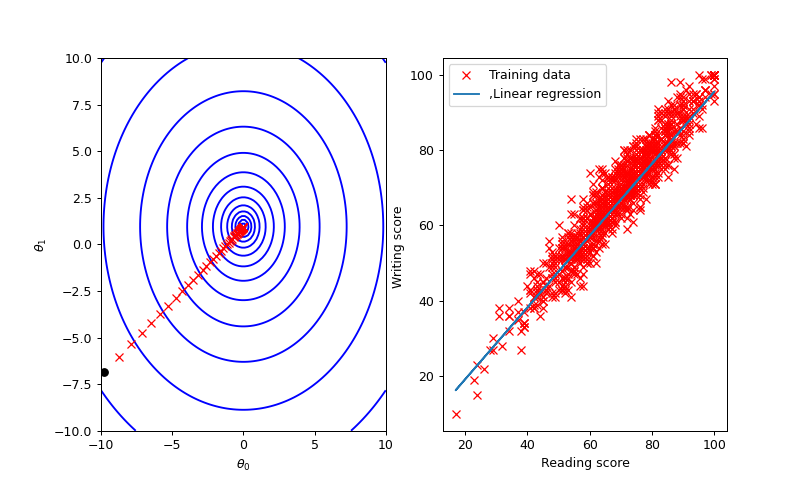

In [109]:
# Configuraciones del descenso del gradiente
iterations = 1000
alpha = 0.01
# Obtenemos los parametros theta y el historial de la funcion de coste
J_history,theta = gradientDesccent(X_train,y_train,alpha,iterations)

#Plot Regresion Lineal 
plt.subplot(122)
plt.plot(  X,y ,'rx',label="Training data" )
plt.plot(XA[:,1] ,XA.dot(theta),label=",Linear regression" )  
plt.xlabel("Reading score")
plt.ylabel('Writing score ')
plt.legend()

<IPython.core.display.Javascript object>


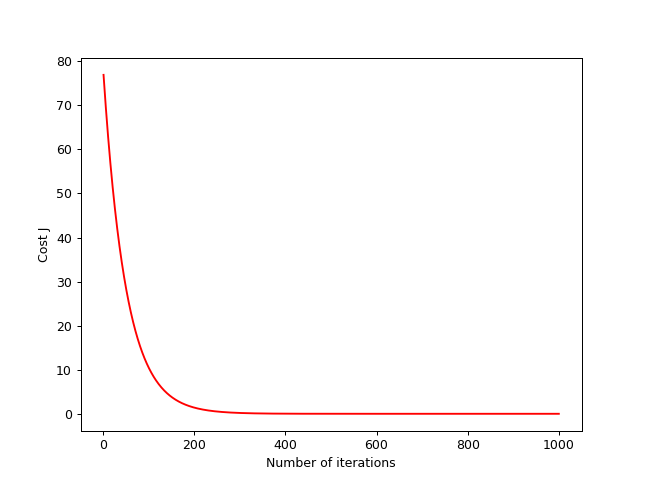

<IPython.core.display.Javascript object>


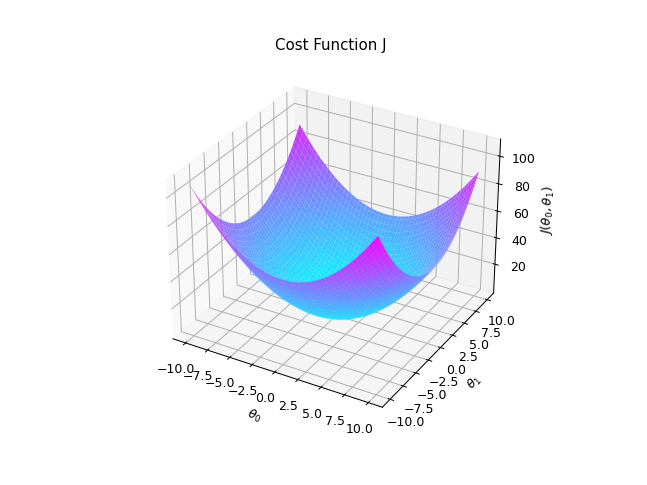

Theta calculado a partir del descenso del gradiente: 

[[-2.41014868e-04]
 [ 9.55497928e-01]]


In [110]:
fig6 = plt.figure(figsize=(8,6))

# PLot Convergencia del descenso del gradiente
plt.plot(np.linspace(1,iterations,iterations),J_history,'r')
plt.xlabel(" Number of iterations ")
plt.ylabel('Cost J')

# Plot Funcion de costo
plot_gradient()

# Resultado del descenso del gradiente
print('Theta calculado a partir del descenso del gradiente: \n');
print( theta)
